## UBER & LYFT CAB PRICES

## Importing all files and libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Import cab rides dataset
df_rides = pd.read_csv('C:\\Users\\sonke\\Documents\\Data mining &ML\\Project\\cab_rides.csv')

# Import weather dataset
df_weather  = pd.read_csv('C:\\Users\\sonke\\Documents\\Data mining &ML\\Project\\weather.csv')

In [3]:
df_rides

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
693066,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
693067,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
693068,1.00,Uber,1543708385534,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
693069,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


In [4]:
df_weather

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49
...,...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,NaN,1543819974,0.96,1.52
6272,44.85,Northeastern University,0.88,1000.71,NaN,1543819974,0.96,1.54
6273,44.82,South Station,0.89,1000.70,NaN,1543819974,0.96,1.54
6274,44.78,Theatre District,0.89,1000.70,NaN,1543819974,0.96,1.54


## DATA PREPROCESSING

## Unifing timestamp format and turn to datetime

In [5]:
df_rides['date_time'] = pd.to_datetime(df_rides['time_stamp']/1000, unit='s')
df_weather['date_time'] = pd.to_datetime(df_weather['time_stamp'], unit='s')

## Merging info location-date-hour wise

In [6]:

df_rides['loc_date_hr'] = df_rides['source'].astype(str) + " - " + df_rides['date_time'].dt.date.astype(str) + " - " + df_rides['date_time'].dt.hour.astype(str)
df_weather['loc_date_hr'] = df_weather['location'].astype(str) + " - " + df_weather['date_time'].dt.date.astype(str) + " - " + df_weather['date_time'].dt.hour.astype(str)

In [7]:
df_weather

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind,date_time,loc_date_hr
0,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25,2018-12-16 23:45:01,Back Bay - 2018-12-16 - 23
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32,2018-12-16 23:45:01,Beacon Hill - 2018-12-16 - 23
2,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07,2018-12-16 23:45:01,Boston University - 2018-12-16 - 23
3,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09,2018-12-16 23:45:01,Fenway - 2018-12-16 - 23
4,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49,2018-12-16 23:45:01,Financial District - 2018-12-16 - 23
...,...,...,...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,NaN,1543819974,0.96,1.52,2018-12-03 06:52:54,North Station - 2018-12-03 - 6
6272,44.85,Northeastern University,0.88,1000.71,NaN,1543819974,0.96,1.54,2018-12-03 06:52:54,Northeastern University - 2018-12-03 - 6
6273,44.82,South Station,0.89,1000.70,NaN,1543819974,0.96,1.54,2018-12-03 06:52:54,South Station - 2018-12-03 - 6
6274,44.78,Theatre District,0.89,1000.70,NaN,1543819974,0.96,1.54,2018-12-03 06:52:54,Theatre District - 2018-12-03 - 6


## Grouping the weather by the location and datetime and updating corresponding parameters with mean value.

In [8]:

weather = df_weather.groupby(['loc_date_hr']).agg({'temp': 'mean', 'clouds': 'mean', 'pressure': 'mean', 'rain': 'mean', 'humidity': 'mean', 'wind': 'mean'}).reset_index()
weather['location'] = df_weather.groupby(['loc_date_hr'])['location'].first().values
weather.index = weather['loc_date_hr']
weather['rain'].fillna(0,inplace=True)

In [9]:
#Merging the both dataset into one using on 'loc_date_hr'
merged_df = df_rides.join(weather,on=['loc_date_hr'],rsuffix ='_w')
merged_df.dropna(inplace=True)

In [10]:
#getting hour as separate feature
merged_df['hour'] = merged_df['date_time'].dt.hour.astype(int)
def categorize_time(hour):
    if 6 <= hour <= 11:
        return 'Morning'
    elif 12 <= hour <= 17:
        return 'Afternoon'
    elif 18 <= hour <= 22:
        return 'Night'
    elif hour == 23 or hour == 0 or hour == 1:
        return 'Late Night'
    elif 2 <= hour <= 5:
        return 'Late Night'

merged_df['day_time'] = merged_df['hour'].apply(categorize_time)

In [11]:
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 635242 entries, 0 to 693070
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   distance          635242 non-null  float64       
 1   cab_type          635242 non-null  object        
 2   time_stamp        635242 non-null  int64         
 3   destination       635242 non-null  object        
 4   source            635242 non-null  object        
 5   price             635242 non-null  float64       
 6   surge_multiplier  635242 non-null  float64       
 7   id                635242 non-null  object        
 8   product_id        635242 non-null  object        
 9   name              635242 non-null  object        
 10  date_time         635242 non-null  datetime64[ns]
 11  loc_date_hr       635242 non-null  object        
 12  loc_date_hr_w     635242 non-null  object        
 13  temp              635242 non-null  float64       
 14  clouds   

### This information tells it does not contain any nulls and missing values.

In [12]:
merged_df.drop(columns=['id','product_id','time_stamp','location','date_time','loc_date_hr','loc_date_hr_w','hour'],axis=1,inplace=True)


In [13]:
merged_df.head()


,distance,cab_type,destination,source,price,surge_multiplier,name,temp,clouds,pressure,rain,humidity,wind,day_time
0,0.44,Lyft,North Station,Haymarket Square,5.0,1.0,Shared,38.460,0.290000,1022.25,0.000,0.760000,7.68,Morning
1,0.44,Lyft,North Station,Haymarket Square,11.0,1.0,Lux,44.065,0.995000,1002.88,0.106,0.895000,12.63,Late Night
3,0.44,Lyft,North Station,Haymarket Square,26.0,1.0,Lux Black XL,35.080,0.000000,1013.71,0.000,0.700000,5.25,Late Night
4,0.44,Lyft,North Station,Haymarket Square,9.0,1.0,Lyft XL,37.680,0.433333,998.42,0.000,0.706667,11.16,Late Night
5,0.44,Lyft,North Station,Haymarket Square,16.5,1.0,Lux Black,40.780,0.930000,1000.15,0.000,0.790000,7.55,Night


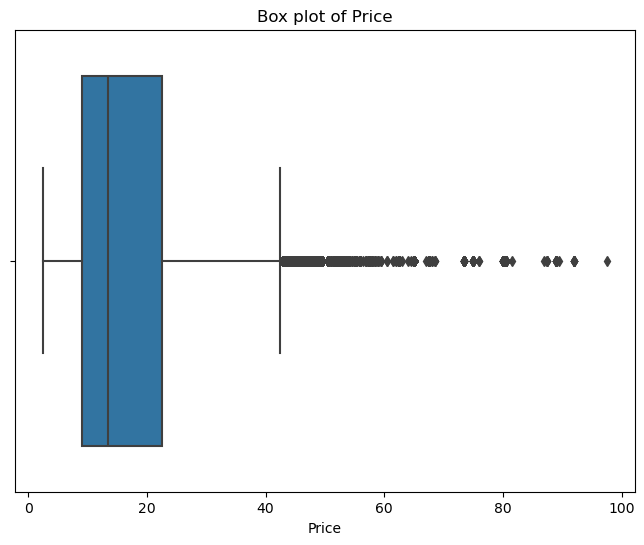

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a box plot to visualize the distribution of the 'price' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=merged_df['price'])
plt.title('Box plot of Price')
plt.xlabel('Price')
plt.show()


### From the box plot, we can conclude that most ride prices are relatively low, with a few rides being significantly more expensive, indicative of outliers or premium pricing.

In [15]:
# Calculate the first and third quartiles
Q1 = merged_df['price'].quantile(0.25)
Q3 = merged_df['price'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to exclude outliers
filtered_df = merged_df[(merged_df['price'] >= lower_bound) & (merged_df['price'] <= upper_bound)]

# Display the filtered DataFrame without outliers
print("Original DataFrame shape:", merged_df.shape)
print("Filtered DataFrame shape (without outliers):", filtered_df.shape)


Original DataFrame shape: (635242, 14)
Filtered DataFrame shape (without outliers): (629676, 14)


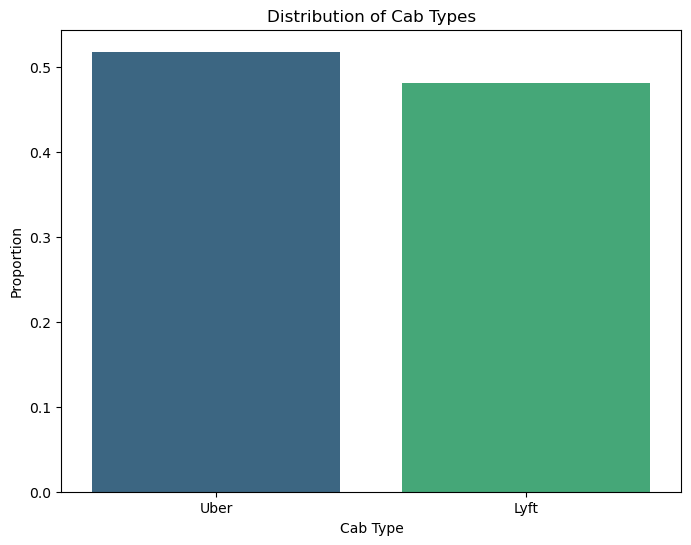

Percentage of Uber rides: 51.81
Percentage of Lyft rides: 48.19


In [16]:
# Check the distribution of the target variable
target_distribution = merged_df['cab_type'].value_counts(normalize=True)

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=target_distribution.index, y=target_distribution.values, palette='viridis')
plt.title('Distribution of Cab Types')
plt.xlabel('Cab Type')
plt.ylabel('Proportion')
plt.show()

# Print the distribution percentages
print("Percentage of Uber rides:", round(target_distribution['Uber'] * 100, 2))
print("Percentage of Lyft rides:", round(target_distribution['Lyft'] * 100, 2))


### 
The bar chart displays the proportion of rides for Uber and Lyft. Both bars are quite similar in height, suggesting a balanced distribution between the two cab types. There doesn't appear to be a significant imbalance issue based on this visualization; the proportions of Uber and Lyft rides in the dataset are almost equal.

In [17]:
#Separating Cab services into Lyft and Uber
# Subsetting dataframe into uber and lyft
df_lyft = merged_df[merged_df['cab_type']=='Lyft'].copy()
df_uber = merged_df[merged_df['cab_type']=='Uber'].copy()

In [18]:
#Separating features and target
X_lyft = df_lyft.drop('price',axis=1)
y_lyft = df_lyft['price'].copy()

X_uber = df_uber.drop('price',axis=1)
y_uber = df_uber['price'].copy()

In [19]:
X_lyft.head()


,distance,cab_type,destination,source,surge_multiplier,name,temp,clouds,pressure,rain,humidity,wind,day_time
0,0.44,Lyft,North Station,Haymarket Square,1.0,Shared,38.460,0.290000,1022.25,0.000,0.760000,7.68,Morning
1,0.44,Lyft,North Station,Haymarket Square,1.0,Lux,44.065,0.995000,1002.88,0.106,0.895000,12.63,Late Night
3,0.44,Lyft,North Station,Haymarket Square,1.0,Lux Black XL,35.080,0.000000,1013.71,0.000,0.700000,5.25,Late Night
4,0.44,Lyft,North Station,Haymarket Square,1.0,Lyft XL,37.680,0.433333,998.42,0.000,0.706667,11.16,Late Night
5,0.44,Lyft,North Station,Haymarket Square,1.0,Lux Black,40.780,0.930000,1000.15,0.000,0.790000,7.55,Night


# Problem 1. Predictive Modeling of Ride-Sharing Prices

In [20]:
# Creating preprocessing pipeline
from sklearn import set_config
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [21]:
#Converting data into machine understandable language
str_attributes = ["cab_type", "destination", "source", "name", "day_time"]
num_attributes = ["distance", "temp", "clouds", "pressure", "rain", "humidity", "wind","surge_multiplier"]

pipeline = ColumnTransformer([
        ("str", OneHotEncoder(drop="first"), str_attributes),
        ("num", StandardScaler(), num_attributes),])

pipeline

ColumnTransformer(transformers=[('str', OneHotEncoder(drop='first'),
                                 ['cab_type', 'destination', 'source', 'name',
                                  'day_time']),
                                ('num', StandardScaler(),
                                 ['distance', 'temp', 'clouds', 'pressure',
                                  'rain', 'humidity', 'wind',
                                  'surge_multiplier'])])

In [22]:
from sklearn.model_selection import train_test_split
X_train_lyft, X_test_lyft, y_train_lyft, y_test_lyft = train_test_split(X_lyft, y_lyft, test_size=0.2, random_state=42)

X_train_lyft_prepared = pipeline.fit_transform(X_train_lyft)

## Model 1: Random Forest Model for Lyft

In [23]:
#Training the model
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
model = make_pipeline(pipeline,RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train_lyft, y_train_lyft)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('str',
                                                  OneHotEncoder(drop='first'),
                                                  ['cab_type', 'destination',
                                                   'source', 'name',
                                                   'day_time']),
                                                 ('num', StandardScaler(),
                                                  ['distance', 'temp', 'clouds',
                                                   'pressure', 'rain',
                                                   'humidity', 'wind',
                                                   'surge_multiplier'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [25]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict and calculate the metrics
y_pred = model.predict(X_test_lyft)

# Calculate Mean Squared Error and then take the square root for RMSE
mse = mean_squared_error(y_test_lyft, y_pred)
rmse = np.sqrt(mse)

# Calculate R^2 Score
r2 = r2_score(y_test_lyft, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 2.0714286547822067
Root Mean Squared Error: 1.4392458632152487
R^2 Score: 0.9792396362494343


## Random forest Model for Uber

In [26]:
# Now, we can properly split the data
X_train_uber, X_test_uber, y_train_uber, y_test_uber = train_test_split(X_uber, y_uber, test_size=0.2, random_state=42)

In [27]:
# Transform the training data using the same pipeline as Lyft
X_train_uber_prepared = pipeline.fit_transform(X_train_uber)

In [28]:
# Using the same RandomForestRegressor for Uber
from sklearn.ensemble import RandomForestRegressor
model_uber = make_pipeline(pipeline, RandomForestRegressor(n_estimators=100, random_state=42))
model_uber.fit(X_train_uber, y_train_uber)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('str',
                                                  OneHotEncoder(drop='first'),
                                                  ['cab_type', 'destination',
                                                   'source', 'name',
                                                   'day_time']),
                                                 ('num', StandardScaler(),
                                                  ['distance', 'temp', 'clouds',
                                                   'pressure', 'rain',
                                                   'humidity', 'wind',
                                                   'surge_multiplier'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [30]:
# Predicting the prices for Uber
y_pred_uber = model_uber.predict(X_test_uber)

# Calculate Mean Squared Error and RMSE for Uber
mse_uber = mean_squared_error(y_test_uber, y_pred_uber)
rmse_uber = np.sqrt(mse_uber)

# Calculate R^2 Score for Uber
r2_uber = r2_score(y_test_uber, y_pred_uber)

print(f"Uber - Mean Squared Error: {mse_uber}")
print(f"Uber - Root Mean Squared Error: {rmse_uber}")
print(f"Uber - R^2 Score: {r2_uber}")

Uber - Mean Squared Error: 4.416493075892113
Uber - Root Mean Squared Error: 2.1015454018155575
Uber - R^2 Score: 0.9397382499751846


## Model 2: Gradient Boosting for Lyft

In [31]:
# By using gradientboosting model
from sklearn.ensemble import GradientBoostingRegressor

# Create a new model with GradientBoostingRegressor
model_gbr = make_pipeline(pipeline, GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42))

# Training the model with Lyft data as an example
model_gbr.fit(X_train_lyft, y_train_lyft)
# Predicting the prices for Lyft
y_pred_lyft_gbr = model_gbr.predict(X_test_lyft)

In [32]:
# Calculate metrics for Lyft with Gradient Boosting Regressor
mse_lyft_gbr = mean_squared_error(y_test_lyft, y_pred_lyft_gbr)
rmse_lyft_gbr = np.sqrt(mse_lyft_gbr)
r2_lyft_gbr = r2_score(y_test_lyft, y_pred_lyft_gbr)

In [33]:
print(f"Gradient Boosting - Lyft - Mean Squared Error: {mse_lyft_gbr}")
print(f"Gradient Boosting - Lyft - Root Mean Squared Error: {rmse_lyft_gbr}")
print(f"Gradient Boosting - Lyft - R^2 Score: {r2_lyft_gbr}")

Gradient Boosting - Lyft - Mean Squared Error: 2.4424127677320633
Gradient Boosting - Lyft - Root Mean Squared Error: 1.5628220524845633
Gradient Boosting - Lyft - R^2 Score: 0.9755215428877638


## Gradient Boosting for Uber

In [34]:
# for Uber
model_gbr.fit(X_train_uber, y_train_uber)
y_pred_uber_gbr = model_gbr.predict(X_test_uber)



In [35]:


mse_uber_gbr = mean_squared_error(y_test_uber, y_pred_uber_gbr)
rmse_uber_gbr = np.sqrt(mse_uber_gbr)
r2_uber_gbr = r2_score(y_test_uber, y_pred_uber_gbr)



In [36]:


print(f"Gradient Boosting - Uber - Mean Squared Error: {mse_uber_gbr}")
print(f"Gradient Boosting - Uber - Root Mean Squared Error: {rmse_uber_gbr}")
print(f"Gradient Boosting - Uber - R^2 Score: {r2_uber_gbr}")

Gradient Boosting - Uber - Mean Squared Error: 4.525215704681024
Gradient Boosting - Uber - Root Mean Squared Error: 2.127255439452682
Gradient Boosting - Uber - R^2 Score: 0.9382547616586554


## Model 3: K Nearest Neighbor Model for Lyft and Uber

In [38]:

from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# List of models to evaluate
models = {
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5),
}

# Splitting the data for Lyft
features_lyft = df_lyft.drop('price', axis=1)  
target_lyft = df_lyft['price']
X_train_lyft, X_test_lyft, y_train_lyft, y_test_lyft = train_test_split(features_lyft, target_lyft, test_size=0.2, random_state=42)

# Splitting the data for Uber
features_uber = df_uber.drop('price', axis=1) 
target_uber = df_uber['price']
X_train_uber, X_test_uber, y_train_uber, y_test_uber = train_test_split(features_uber, target_uber, test_size=0.2, random_state=42)




In [41]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def evaluate_model(model_name, model, X_train, y_train, X_test, y_test, dataset_name):
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict using the model
    y_pred = model.predict(X_test)
    
    # Calculate Mean Squared Error and then take the square root for RMSE
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    # Calculate R^2 Score
    r2 = r2_score(y_test, y_pred)
    
    # Print the evaluation metrics
    print(f"{model_name} - {dataset_name} - Mean Squared Error: {mse}")
    print(f"{model_name} - {dataset_name} - Root Mean Squared Error: {rmse}")
    print(f"{model_name} - {dataset_name} - R² Score: {r2}")

# Example usage:
# Assuming `models` is a dictionary of sklearn model instances
from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical features
encoder = OneHotEncoder(drop='first', handle_unknown="ignore")
X_train_lyft_encoded = encoder.fit_transform(X_train_lyft)
X_test_lyft_encoded = encoder.transform(X_test_lyft)

# Apply each model to the Lyft dataset
for model_name, model in models.items():
    print(f"Applying {model_name}:")
    evaluate_model(model_name, model, X_train_lyft_encoded, y_train_lyft, X_test_lyft_encoded, y_test_lyft, "Lyft")


Applying K-Nearest Neighbors:
K-Nearest Neighbors - Lyft - Mean Squared Error: 51.50064095836396
K-Nearest Neighbors - Lyft - Root Mean Squared Error: 7.176394704750009
K-Nearest Neighbors - Lyft - R² Score: 0.4838480016125255


In [42]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical features for Uber

encoder = OneHotEncoder(drop='first', handle_unknown="ignore")
X_train_uber_encoded = encoder.fit_transform(X_train_uber)
X_test_uber_encoded = encoder.transform(X_test_uber)
# Apply each model to both Lyft and Uber datasets
for model_name, model in models.items():
    print(f"Applying {model_name}:")

    
    # Evaluate for Uber
    evaluate_model(model_name, model, X_train_uber_encoded, y_train_uber, X_test_uber_encoded, y_test_uber, "Uber")


C:\Users\sonke\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Applying K-Nearest Neighbors:
K-Nearest Neighbors - Uber - Mean Squared Error: 45.85006744850215
K-Nearest Neighbors - Uber - Root Mean Squared Error: 6.771267787386802
K-Nearest Neighbors - Uber - R² Score: 0.3743893048797672


## Graphical representation and comparison of all models

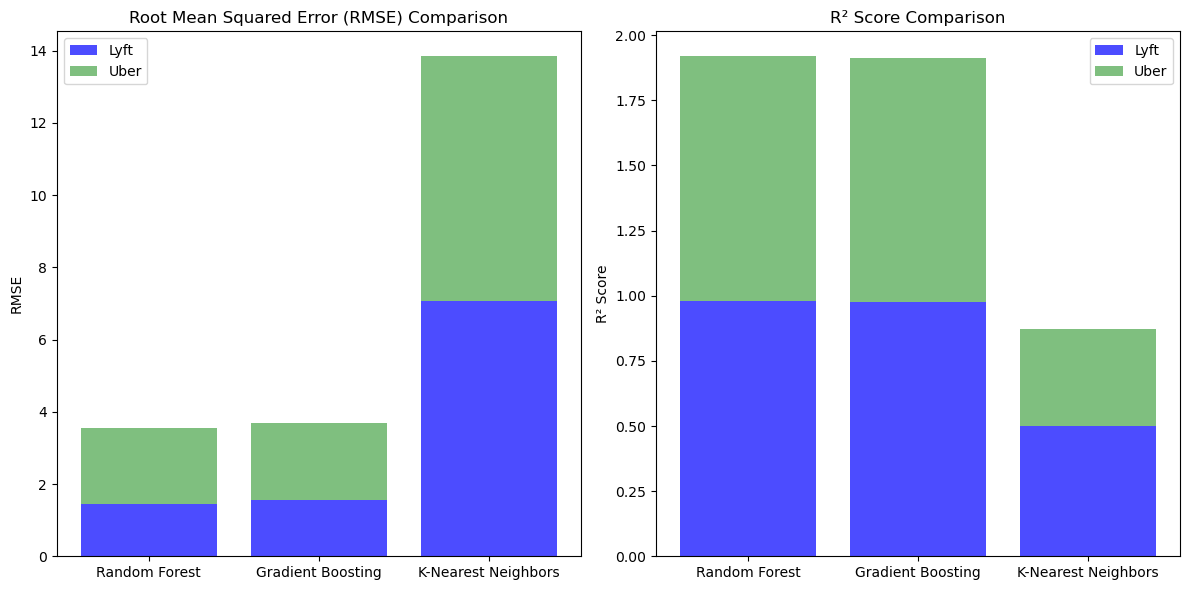

In [43]:
import matplotlib.pyplot as plt

# Data for plotting
models = ['Random Forest', 'Gradient Boosting', 'K-Nearest Neighbors']
rmse_lyft = [1.439, 1.563, 7.071]
r2_lyft = [0.979, 0.976, 0.499]
rmse_uber = [2.102, 2.127, 6.771]
r2_uber = [0.940, 0.938, 0.374]

# Plotting the Root Mean Squared Error (RMSE)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(models, rmse_lyft, color='blue', alpha=0.7, label='Lyft')
plt.bar(models, rmse_uber, color='green', alpha=0.5, label='Uber', bottom=rmse_lyft)
plt.title('Root Mean Squared Error (RMSE) Comparison')
plt.ylabel('RMSE')
plt.legend()

# Plotting the R² Scores
plt.subplot(1, 2, 2)
plt.bar(models, r2_lyft, color='blue', alpha=0.7, label='Lyft')
plt.bar(models, r2_uber, color='green', alpha=0.5, label='Uber', bottom=r2_lyft)
plt.title('R² Score Comparison')
plt.ylabel('R² Score')
plt.legend()

plt.tight_layout()
plt.show()


### For both Lyft and Uber, the Random Forest Regressor shows the lowest RMSE and the highest R² Score, making it the best model among the ones evaluated based on these metrics.

# Problem 2: Rain Impact on Uber and Lyft datasets

In [44]:
# Step 1: Create a new DataFrame with relevant columns
weather_impact_df = merged_df[['cab_type', 'destination', 'source', 'name', 'day_time','price', 'rain']].copy()

# Step 2: Separate the data into Uber and Lyft datasets
uber_weather_df = weather_impact_df[weather_impact_df['cab_type'] == 'Uber'].copy()
lyft_weather_df = weather_impact_df[weather_impact_df['cab_type'] == 'Lyft'].copy()


In [45]:
weather_impact_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 635242 entries, 0 to 693070
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   cab_type     635242 non-null  object 
 1   destination  635242 non-null  object 
 2   source       635242 non-null  object 
 3   name         635242 non-null  object 
 4   day_time     635242 non-null  object 
 5   price        635242 non-null  float64
 6   rain         635242 non-null  float64
dtypes: float64(2), object(5)
memory usage: 38.8+ MB


In [46]:
uber_weather_df


,cab_type,destination,source,name,day_time,price,rain
12,Uber,West End,North End,UberXL,Night,12.0,0.0000
13,Uber,West End,North End,Black,Morning,16.0,0.0000
14,Uber,West End,North End,UberX,Night,7.5,0.0000
15,Uber,West End,North End,WAV,Late Night,7.5,0.2088
16,Uber,West End,North End,Black SUV,Late Night,26.0,0.0000
...,...,...,...,...,...,...,...
693065,Uber,North End,West End,WAV,Late Night,9.5,0.0000
693066,Uber,North End,West End,UberXL,Late Night,13.0,0.0000
693067,Uber,North End,West End,UberX,Late Night,9.5,0.0000
693069,Uber,North End,West End,Black SUV,Late Night,27.0,0.0000


In [47]:
lyft_weather_df

,cab_type,destination,source,name,day_time,price,rain
0,Lyft,North Station,Haymarket Square,Shared,Morning,5.0,0.0000
1,Lyft,North Station,Haymarket Square,Lux,Late Night,11.0,0.1060
3,Lyft,North Station,Haymarket Square,Lux Black XL,Late Night,26.0,0.0000
4,Lyft,North Station,Haymarket Square,Lyft XL,Late Night,9.0,0.0000
5,Lyft,North Station,Haymarket Square,Lux Black,Night,16.5,0.0000
...,...,...,...,...,...,...,...
693042,Lyft,Fenway,Theatre District,Lyft XL,Late Night,16.5,0.0013
693043,Lyft,Fenway,Theatre District,Lux,Late Night,22.5,0.0013
693048,Lyft,Fenway,Theatre District,Shared,Late Night,7.0,0.0013
693051,Lyft,Fenway,Theatre District,Lyft,Late Night,10.5,0.0013


## Model 1: Linear Regression for Uber and Lyft

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split the data into training and testing sets for Uber
X_train_uber, X_test_uber, y_train_uber, y_test_uber = train_test_split(uber_weather_df.drop(columns=['price']), 
                                                                        uber_weather_df['price'], 
                                                                        test_size=0.2, random_state=42)

# Split the data into training and testing sets for Lyft
X_train_lyft, X_test_lyft, y_train_lyft, y_test_lyft = train_test_split(lyft_weather_df.drop(columns=['price']), 
                                                                        lyft_weather_df['price'], 
                                                                        test_size=0.2, random_state=42)

# Define preprocessing steps
# For simplicity, we'll apply OneHotEncoding to all categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['cab_type', 'destination', 'source', 'name', 'day_time'])
    ],
    remainder='passthrough'
)

# Define Linear Regression model
linear_reg = LinearRegression()

# Create pipeline for Uber
uber_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', linear_reg)
])

# Fit and evaluate Linear Regression model for Uber
uber_pipeline.fit(X_train_uber, y_train_uber)
y_pred_uber = uber_pipeline.predict(X_test_uber)

mse_uber = mean_squared_error(y_test_uber, y_pred_uber)
rmse_uber = np.sqrt(mse_uber)
r2_uber = r2_score(y_test_uber, y_pred_uber)

print("Linear Regression Metrics for Uber:")
print(f"Mean Squared Error: {mse_uber}")
print(f"Root Mean Squared Error: {rmse_uber}")
print(f"R^2 Score: {r2_uber}")

# Create pipeline for Lyft
lyft_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', linear_reg)
])

# Fit and evaluate Linear Regression model for Lyft
lyft_pipeline.fit(X_train_lyft, y_train_lyft)
y_pred_lyft = lyft_pipeline.predict(X_test_lyft)

mse_lyft = mean_squared_error(y_test_lyft, y_pred_lyft)
rmse_lyft = np.sqrt(mse_lyft)
r2_lyft = r2_score(y_test_lyft, y_pred_lyft)

print("\nLinear Regression Metrics for Lyft:")
print(f"Mean Squared Error: {mse_lyft}")
print(f"Root Mean Squared Error: {rmse_lyft}")
print(f"R^2 Score: {r2_lyft}")


Linear Regression Metrics for Uber:
Mean Squared Error: 11.415558996212422
Root Mean Squared Error: 3.378691906080284
R^2 Score: 0.8442380524995327

Linear Regression Metrics for Lyft:
Mean Squared Error: 19.443503372774178
Root Mean Squared Error: 4.409478809652471
R^2 Score: 0.8051324617566507


## Model 2: Random Forest for Lyft

In [49]:
# Define Random Forest Regressor model - LYFT
rf_reg_lyft = RandomForestRegressor(n_estimators=100, random_state=42)

# Create pipeline for Lyft with Random Forest Regressor
lyft_rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', rf_reg_lyft)
])

# Fit and evaluate Random Forest Regressor model for Lyft
lyft_rf_pipeline.fit(X_train_lyft, y_train_lyft)
y_pred_lyft_rf = lyft_rf_pipeline.predict(X_test_lyft)

mse_lyft_rf = mean_squared_error(y_test_lyft, y_pred_lyft_rf)
rmse_lyft_rf = np.sqrt(mse_lyft_rf)
r2_lyft_rf = r2_score(y_test_lyft, y_pred_lyft_rf)

print("\nRandom Forest Regressor Metrics for Lyft:")
print(f"Mean Squared Error: {mse_lyft_rf}")
print(f"Root Mean Squared Error: {rmse_lyft_rf}")
print(f"R^2 Score: {r2_lyft_rf}")



Random Forest Regressor Metrics for Lyft:
Mean Squared Error: 10.416639821322143
Root Mean Squared Error: 3.227481962973944
R^2 Score: 0.895601892321987


## Random Forest for Uber

In [50]:
# Random Forest Regressor model - Uber
from sklearn.ensemble import RandomForestRegressor

# Define Random Forest Regressor model
rf_reg_uber = RandomForestRegressor(n_estimators=100, random_state=42)

# Create pipeline for Uber with Random Forest Regressor
uber_rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', rf_reg_uber)
])

# Fit and evaluate Random Forest Regressor model for Uber
uber_rf_pipeline.fit(X_train_uber, y_train_uber)
y_pred_uber_rf = uber_rf_pipeline.predict(X_test_uber)

mse_uber_rf = mean_squared_error(y_test_uber, y_pred_uber_rf)
rmse_uber_rf = np.sqrt(mse_uber_rf)
r2_uber_rf = r2_score(y_test_uber, y_pred_uber_rf)

print("Random Forest Regressor Metrics for Uber:")
print(f"Mean Squared Error: {mse_uber_rf}")
print(f"Root Mean Squared Error: {rmse_uber_rf}")
print(f"R^2 Score: {r2_uber_rf}")


Random Forest Regressor Metrics for Uber:
Mean Squared Error: 4.733828576776546
Root Mean Squared Error: 2.1757363297919503
R^2 Score: 0.935408300329688


## Model 3: Gradient Boosting Model for Lyft

In [51]:
# Define Gradient Boosting Regressor model - LYFT
gb_reg_lyft = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Create pipeline for Lyft with Gradient Boosting Regressor
lyft_gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', gb_reg_lyft)
])

# Fit and evaluate Gradient Boosting Regressor model for Lyft
lyft_gb_pipeline.fit(X_train_lyft, y_train_lyft)
y_pred_lyft_gb = lyft_gb_pipeline.predict(X_test_lyft)

mse_lyft_gb = mean_squared_error(y_test_lyft, y_pred_lyft_gb)
rmse_lyft_gb = np.sqrt(mse_lyft_gb)
r2_lyft_gb = r2_score(y_test_lyft, y_pred_lyft_gb)

print("\nGradient Boosting Regressor Metrics for Lyft:")
print(f"Mean Squared Error: {mse_lyft_gb}")
print(f"Root Mean Squared Error: {rmse_lyft_gb}")
print(f"R^2 Score: {r2_lyft_gb}")



Gradient Boosting Regressor Metrics for Lyft:
Mean Squared Error: 13.239514513246135
Root Mean Squared Error: 3.6386143672071287
R^2 Score: 0.8673103529096534


## Gradient Boosting for Uber

In [110]:
# Define Gradient Boosting Regressor model - UBER
gb_reg_uber = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Create pipeline for Uber with Gradient Boosting Regressor
uber_gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', gb_reg_uber)
])

# Fit and evaluate Gradient Boosting Regressor model for Uber
uber_gb_pipeline.fit(X_train_uber, y_train_uber)
y_pred_uber_gb = uber_gb_pipeline.predict(X_test_uber)

mse_uber_gb = mean_squared_error(y_test_uber, y_pred_uber_gb)
rmse_uber_gb = np.sqrt(mse_uber_gb)
r2_uber_gb = r2_score(y_test_uber, y_pred_uber_gb)

print("Gradient Boosting Regressor Metrics for Uber:")
print(f"Mean Squared Error: {mse_uber_gb}")
print(f"Root Mean Squared Error: {rmse_uber_gb}")
print(f"R^2 Score: {r2_uber_gb}")


Gradient Boosting Regressor Metrics for Uber:
Mean Squared Error: 6.67449140707276
Root Mean Squared Error: 2.583503707578675
R^2 Score: 0.9089285263660125


## Model 4: K nearset neighbor for Lyft

In [52]:
# Define KNN Regressor model - LYFT
knn_reg_lyft = KNeighborsRegressor(n_neighbors=5)

# Create pipeline for Lyft with KNN Regressor
lyft_knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', knn_reg_lyft)
])

# Fit and evaluate KNN Regressor model for Lyft
lyft_knn_pipeline.fit(X_train_lyft, y_train_lyft)
y_pred_lyft_knn = lyft_knn_pipeline.predict(X_test_lyft)

mse_lyft_knn = mean_squared_error(y_test_lyft, y_pred_lyft_knn)
rmse_lyft_knn = np.sqrt(mse_lyft_knn)
r2_lyft_knn = r2_score(y_test_lyft, y_pred_lyft_knn)

print("\nKNN Regressor Metrics for Lyft:")
print(f"Mean Squared Error: {mse_lyft_knn}")
print(f"Root Mean Squared Error: {rmse_lyft_knn}")
print(f"R^2 Score: {r2_lyft_knn}")



KNN Regressor Metrics for Lyft:
Mean Squared Error: 11.632768817889286
Root Mean Squared Error: 3.410684508700458
R^2 Score: 0.8834135505811034


## K nearest neighbor for Uber

In [112]:


# Define KNN Regressor model - UBER
knn_reg_uber = KNeighborsRegressor(n_neighbors=5)

# Create pipeline for Uber with KNN Regressor
uber_knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', knn_reg_uber)
])

# Fit and evaluate KNN Regressor model for Uber
uber_knn_pipeline.fit(X_train_uber, y_train_uber)
y_pred_uber_knn = uber_knn_pipeline.predict(X_test_uber)

mse_uber_knn = mean_squared_error(y_test_uber, y_pred_uber_knn)
rmse_uber_knn = np.sqrt(mse_uber_knn)
r2_uber_knn = r2_score(y_test_uber, y_pred_uber_knn)

print("KNN Regressor Metrics for Uber:")
print(f"Mean Squared Error: {mse_uber_knn}")
print(f"Root Mean Squared Error: {rmse_uber_knn}")
print(f"R^2 Score: {r2_uber_knn}")



KNN Regressor Metrics for Uber:
Mean Squared Error: 5.278438202588566
Root Mean Squared Error: 2.297485190939991
R^2 Score: 0.9279772620448238


## Graphical Representation of comparison of all models

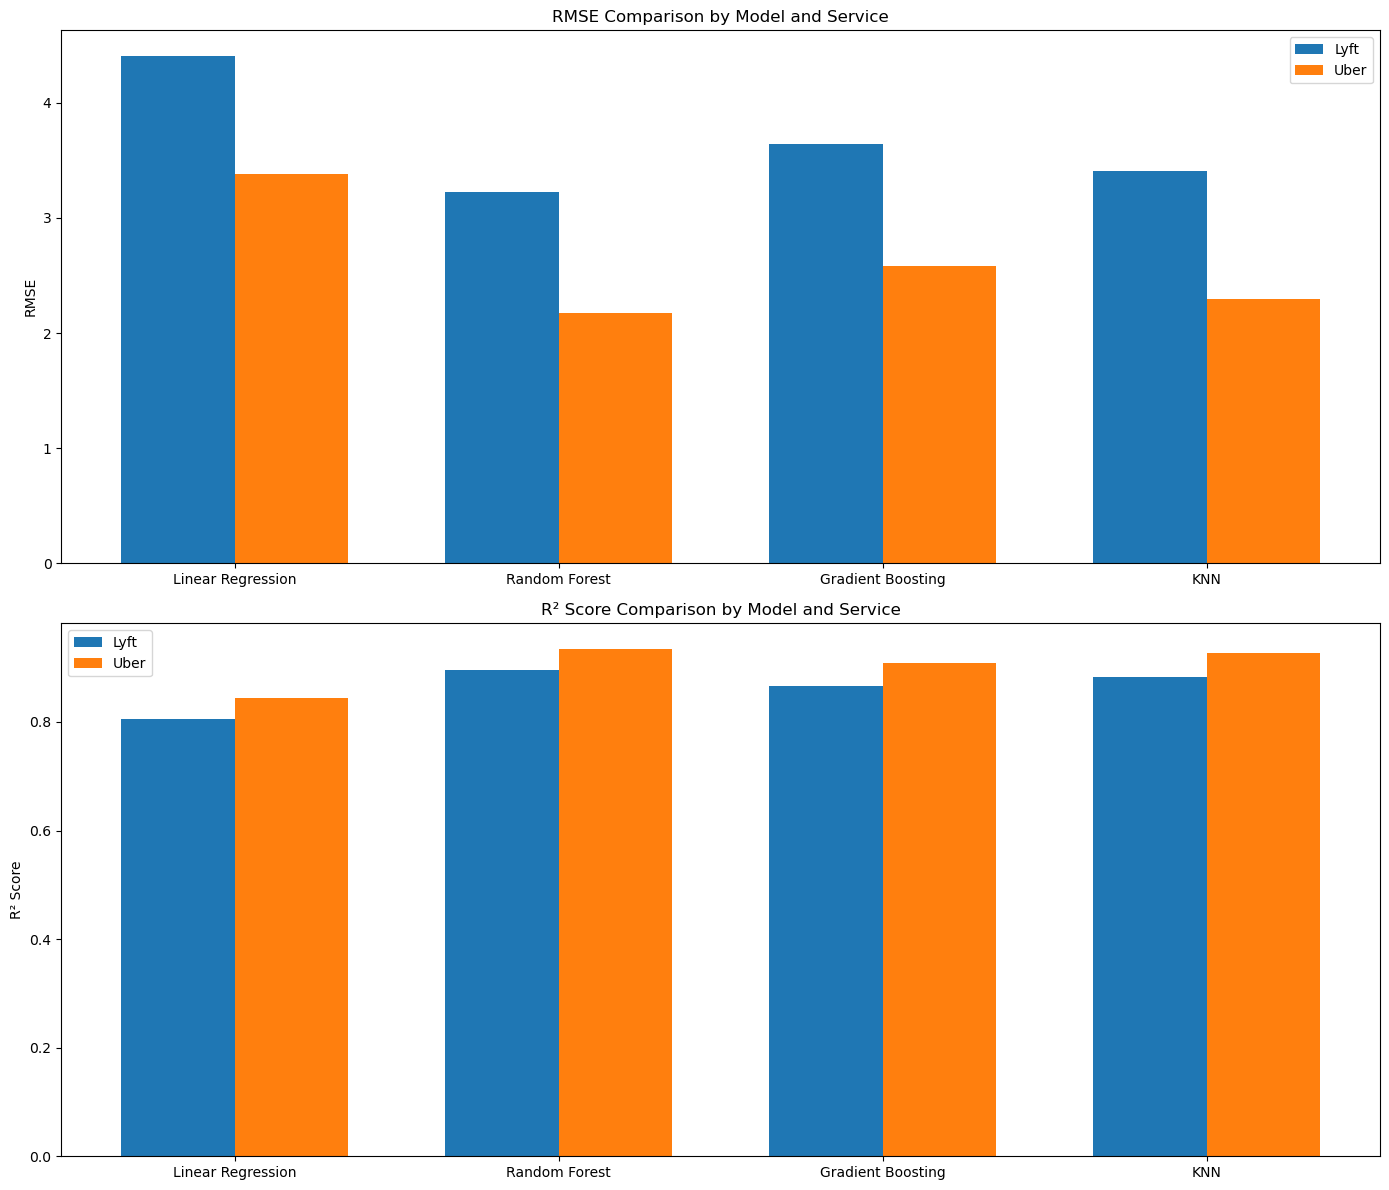

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'KNN']
rmse_lyft = [4.409, 3.227, 3.639, 3.411]
r2_lyft = [0.805, 0.896, 0.867, 0.883]
rmse_uber = [3.379, 2.176, 2.584, 2.297]
r2_uber = [0.844, 0.935, 0.909, 0.928]

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(2, figsize=(14, 12))

# RMSE comparison
rects1 = ax[0].bar(x - width/2, rmse_lyft, width, label='Lyft')
rects2 = ax[0].bar(x + width/2, rmse_uber, width, label='Uber')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0].set_ylabel('RMSE')
ax[0].set_title('RMSE Comparison by Model and Service')
ax[0].set_xticks(x)
ax[0].set_xticklabels(models)
ax[0].legend()

# R² score comparison
rects3 = ax[1].bar(x - width/2, r2_lyft, width, label='Lyft')
rects4 = ax[1].bar(x + width/2, r2_uber, width, label='Uber')

ax[1].set_ylabel('R² Score')
ax[1].set_title('R² Score Comparison by Model and Service')
ax[1].set_xticks(x)
ax[1].set_xticklabels(models)
ax[1].legend()

fig.tight_layout()

plt.show()


### For Lyft, the Random Forest Regressor shows the lowest RMSE and the highest R² Score, suggesting it is the best model for this dataset. 
For Uber, similarly, the Random Forest Regressor exhibits the best performance in terms of both RMSE and R² Score.

# Problem 3: Time impact of Uber and Lyft

In [55]:
# Step 1: Create a new DataFrame with relevant columns
time_impact_df = merged_df[['cab_type', 'destination', 'source', 'name', 'day_time', 'price']].copy()

# Step 2: Separate the data into Uber and Lyft datasets
uber_time_df = time_impact_df[time_impact_df['cab_type'] == 'Uber'].copy()
lyft_time_df = time_impact_df[time_impact_df['cab_type'] == 'Lyft'].copy()


In [56]:
time_impact_df

,cab_type,destination,source,name,day_time,price
0,Lyft,North Station,Haymarket Square,Shared,Morning,5.0
1,Lyft,North Station,Haymarket Square,Lux,Late Night,11.0
3,Lyft,North Station,Haymarket Square,Lux Black XL,Late Night,26.0
4,Lyft,North Station,Haymarket Square,Lyft XL,Late Night,9.0
5,Lyft,North Station,Haymarket Square,Lux Black,Night,16.5
...,...,...,...,...,...,...
693065,Uber,North End,West End,WAV,Late Night,9.5
693066,Uber,North End,West End,UberXL,Late Night,13.0
693067,Uber,North End,West End,UberX,Late Night,9.5
693069,Uber,North End,West End,Black SUV,Late Night,27.0


In [57]:
time_impact_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 635242 entries, 0 to 693070
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   cab_type     635242 non-null  object 
 1   destination  635242 non-null  object 
 2   source       635242 non-null  object 
 3   name         635242 non-null  object 
 4   day_time     635242 non-null  object 
 5   price        635242 non-null  float64
dtypes: float64(1), object(5)
memory usage: 33.9+ MB


In [58]:
uber_time_df

,cab_type,destination,source,name,day_time,price
12,Uber,West End,North End,UberXL,Night,12.0
13,Uber,West End,North End,Black,Morning,16.0
14,Uber,West End,North End,UberX,Night,7.5
15,Uber,West End,North End,WAV,Late Night,7.5
16,Uber,West End,North End,Black SUV,Late Night,26.0
...,...,...,...,...,...,...
693065,Uber,North End,West End,WAV,Late Night,9.5
693066,Uber,North End,West End,UberXL,Late Night,13.0
693067,Uber,North End,West End,UberX,Late Night,9.5
693069,Uber,North End,West End,Black SUV,Late Night,27.0


In [59]:
lyft_time_df

,cab_type,destination,source,name,day_time,price
0,Lyft,North Station,Haymarket Square,Shared,Morning,5.0
1,Lyft,North Station,Haymarket Square,Lux,Late Night,11.0
3,Lyft,North Station,Haymarket Square,Lux Black XL,Late Night,26.0
4,Lyft,North Station,Haymarket Square,Lyft XL,Late Night,9.0
5,Lyft,North Station,Haymarket Square,Lux Black,Night,16.5
...,...,...,...,...,...,...
693042,Lyft,Fenway,Theatre District,Lyft XL,Late Night,16.5
693043,Lyft,Fenway,Theatre District,Lux,Late Night,22.5
693048,Lyft,Fenway,Theatre District,Shared,Late Night,7.0
693051,Lyft,Fenway,Theatre District,Lyft,Late Night,10.5


In [60]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define categorical and numerical features
categorical_features = ['cab_type', 'destination', 'source', 'name', 'day_time']
numerical_features = []  # No numerical features in this case

# Define preprocessing steps for categorical and numerical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()

# Combine preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])

# Display pipeline configuration
set_config(display='diagram')

# Create the preprocessing pipeline
preprocessing_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Apply preprocessing pipeline to the data
# transformed_data = preprocessing_pipeline.fit_transform(data)


In [61]:
from sklearn import set_config

# Display pipeline configuration
set_config(display='diagram')

# Display the preprocessing pipeline
preprocessing_pipeline


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['cab_type', 'destination',
                                                   'source', 'name',
                                                   'day_time']),
                                                 ('num', StandardScaler(),
                                                  [])]))])

## Model 1: Random Forest for Uber

In [62]:
#UBER
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Splitting data into features and target
X_uber_processed = preprocessing_pipeline.fit_transform(uber_time_df)
y_uber = uber_time_df['price']

# Display pipeline configuration
set_config(display='diagram')

# Display the preprocessing pipeline
preprocessing_pipeline

# Splitting data into training and testing sets
X_train_uber, X_test_uber, y_train_uber, y_test_uber = train_test_split(X_uber_processed, y_uber, test_size=0.2, random_state=42)

# Creating and training the Random Forest Regressor model
rf_regressor_uber = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor_uber.fit(X_train_uber, y_train_uber)

# Making predictions on the test set
y_pred_uber = rf_regressor_uber.predict(X_test_uber)

# Calculating evaluation metrics
mse_uber = mean_squared_error(y_test_uber, y_pred_uber)
rmse_uber = np.sqrt(mse_uber)
r2_uber = r2_score(y_test_uber, y_pred_uber)

print("Random Forest Regressor Metrics for Uber:")
print("Mean Squared Error:", mse_uber)
print("Root Mean Squared Error:", rmse_uber)
print("R^2 Score:", r2_uber)


Random Forest Regressor Metrics for Uber:
Mean Squared Error: 4.539341752435637
Root Mean Squared Error: 2.1305731042223446
R^2 Score: 0.9380620158886521


## Random Forest for Lyft

In [63]:
#LYFT
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import set_config

# Display pipeline configuration
set_config(display='diagram')

# Splitting data into features and target
X_lyft_processed = preprocessing_pipeline.fit_transform(lyft_time_df)
y_lyft = lyft_time_df['price']

# Display the preprocessing pipeline
preprocessing_pipeline

# Splitting data into training and testing sets
X_train_lyft, X_test_lyft, y_train_lyft, y_test_lyft = train_test_split(X_lyft_processed, y_lyft, test_size=0.2, random_state=42)

# Creating and training the Random Forest Regressor model
rf_regressor_lyft = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor_lyft.fit(X_train_lyft, y_train_lyft)

# Making predictions on the test set
y_pred_lyft = rf_regressor_lyft.predict(X_test_lyft)

# Calculating evaluation metrics
mse_lyft = mean_squared_error(y_test_lyft, y_pred_lyft)
rmse_lyft = np.sqrt(mse_lyft)
r2_lyft = r2_score(y_test_lyft, y_pred_lyft)

print("Random Forest Regressor Metrics for Lyft:")
print("Mean Squared Error:", mse_lyft)
print("Root Mean Squared Error:", rmse_lyft)
print("R^2 Score:", r2_lyft)


Random Forest Regressor Metrics for Lyft:
Mean Squared Error: 9.910944029211533
Root Mean Squared Error: 3.148165184549809
R^2 Score: 0.9006700990242112


## Model 2: Gradient Boosting for Lyft

In [135]:
# LYFT GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Splitting data into features and target
X_lyft_processed = preprocessing_pipeline.fit_transform(lyft_time_df)
y_lyft = lyft_time_df['price']

# Display pipeline configuration
set_config(display='diagram')

# Display the preprocessing pipeline
preprocessing_pipeline

# Splitting data into training and testing sets
X_train_lyft, X_test_lyft, y_train_lyft, y_test_lyft = train_test_split(X_lyft_processed, y_lyft, test_size=0.2, random_state=42)

# Creating and training the Gradient Boosting Regressor model
gb_regressor_lyft = GradientBoostingRegressor(random_state=42)
gb_regressor_lyft.fit(X_train_lyft, y_train_lyft)

# Making predictions on the test set
y_pred_lyft = gb_regressor_lyft.predict(X_test_lyft)

# Calculating evaluation metrics
mse_lyft = mean_squared_error(y_test_lyft, y_pred_lyft)
rmse_lyft = np.sqrt(mse_lyft)
r2_lyft = r2_score(y_test_lyft, y_pred_lyft)

print("Gradient Boosting Regressor Metrics for Lyft:")
print("Mean Squared Error:", mse_lyft)
print("Root Mean Squared Error:", rmse_lyft)
print("R^2 Score:", r2_lyft)


Gradient Boosting Regressor Metrics for Lyft:
Mean Squared Error: 13.239514513246137
Root Mean Squared Error: 3.638614367207129
R^2 Score: 0.8673103529096533


## Gradient Boosting for Uber

In [136]:
#UBER
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Splitting data into features and target
X_uber_processed = preprocessing_pipeline.fit_transform(uber_time_df)
y_uber = uber_time_df['price']

# Display pipeline configuration
set_config(display='diagram')

# Display the preprocessing pipeline
preprocessing_pipeline

# Splitting data into training and testing sets
X_train_uber, X_test_uber, y_train_uber, y_test_uber = train_test_split(X_uber_processed, y_uber, test_size=0.2, random_state=42)

# Creating and training the Gradient Boosting Regressor model
gb_regressor_uber = GradientBoostingRegressor(random_state=42)
gb_regressor_uber.fit(X_train_uber, y_train_uber)

# Making predictions on the test set
y_pred_uber = gb_regressor_uber.predict(X_test_uber)

# Calculating evaluation metrics
mse_uber = mean_squared_error(y_test_uber, y_pred_uber)
rmse_uber = np.sqrt(mse_uber)
r2_uber = r2_score(y_test_uber, y_pred_uber)

print("Gradient Boosting Regressor Metrics for Uber:")
print("Mean Squared Error:", mse_uber)
print("Root Mean Squared Error:", rmse_uber)
print("R^2 Score:", r2_uber)


Gradient Boosting Regressor Metrics for Uber:
Mean Squared Error: 6.673650404200625
Root Mean Squared Error: 2.5833409384362387
R^2 Score: 0.9089400016030342


## Model 3: K nearest neighbor for Lyft

In [137]:
#LYFT KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Splitting data into features and target
X_lyft_processed = preprocessing_pipeline.fit_transform(lyft_time_df)
y_lyft = lyft_time_df['price']

# Display pipeline configuration
set_config(display='diagram')

# Display the preprocessing pipeline
preprocessing_pipeline

# Splitting data into training and testing sets
X_train_lyft, X_test_lyft, y_train_lyft, y_test_lyft = train_test_split(X_lyft_processed, y_lyft, test_size=0.2, random_state=42)

# Creating and training the KNN Regressor model
knn_regressor_lyft = KNeighborsRegressor()
knn_regressor_lyft.fit(X_train_lyft, y_train_lyft)

# Making predictions on the test set
y_pred_lyft = knn_regressor_lyft.predict(X_test_lyft)

# Calculating evaluation metrics
mse_lyft = mean_squared_error(y_test_lyft, y_pred_lyft)
rmse_lyft = np.sqrt(mse_lyft)
r2_lyft = r2_score(y_test_lyft, y_pred_lyft)

print("KNN Regressor Metrics for Lyft:")
print("Mean Squared Error:", mse_lyft)
print("Root Mean Squared Error:", rmse_lyft)
print("R^2 Score:", r2_lyft)


KNN Regressor Metrics for Lyft:
Mean Squared Error: 11.767794425115564
Root Mean Squared Error: 3.4304219019117115
R^2 Score: 0.8820602909768265


## K nearest neighbors for Uber

In [138]:
#UBER
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Splitting data into features and target
X_uber_processed = preprocessing_pipeline.fit_transform(uber_time_df)
y_uber = uber_time_df['price']

# Display pipeline configuration
set_config(display='diagram')

# Display the preprocessing pipeline
preprocessing_pipeline

# Splitting data into training and testing sets
X_train_uber, X_test_uber, y_train_uber, y_test_uber = train_test_split(X_uber_processed, y_uber, test_size=0.2, random_state=42)

# Creating and training the KNN Regressor model
knn_regressor_uber = KNeighborsRegressor()
knn_regressor_uber.fit(X_train_uber, y_train_uber)

# Making predictions on the test set
y_pred_uber = knn_regressor_uber.predict(X_test_uber)

# Calculating evaluation metrics
mse_uber = mean_squared_error(y_test_uber, y_pred_uber)
rmse_uber = np.sqrt(mse_uber)
r2_uber = r2_score(y_test_uber, y_pred_uber)

print("KNN Regressor Metrics for Uber:")
print("Mean Squared Error:", mse_uber)
print("Root Mean Squared Error:", rmse_uber)
print("R^2 Score:", r2_uber)


KNN Regressor Metrics for Uber:
Mean Squared Error: 5.301895697879322
Root Mean Squared Error: 2.302584569104753
R^2 Score: 0.9276571914156777


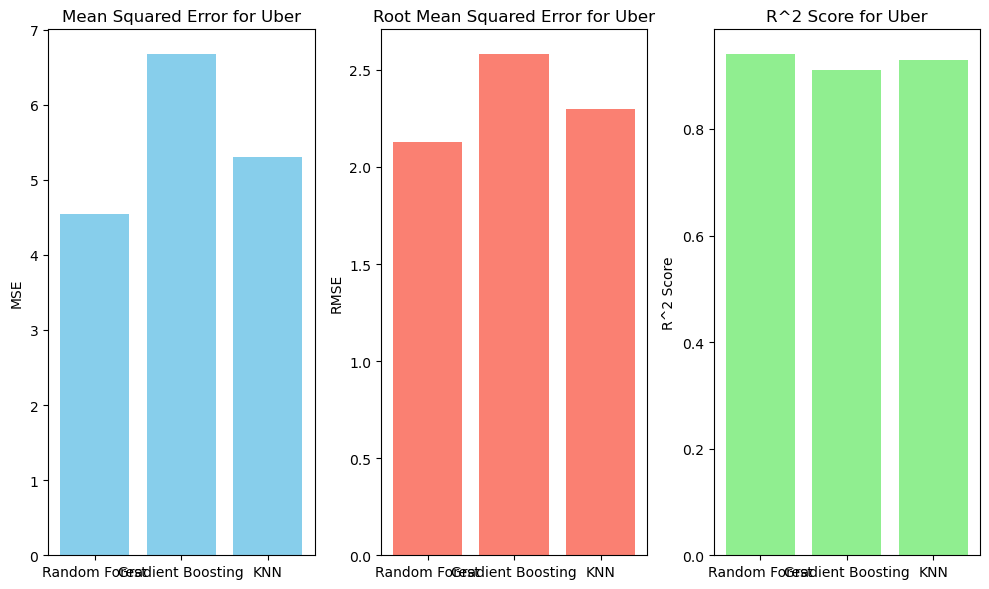

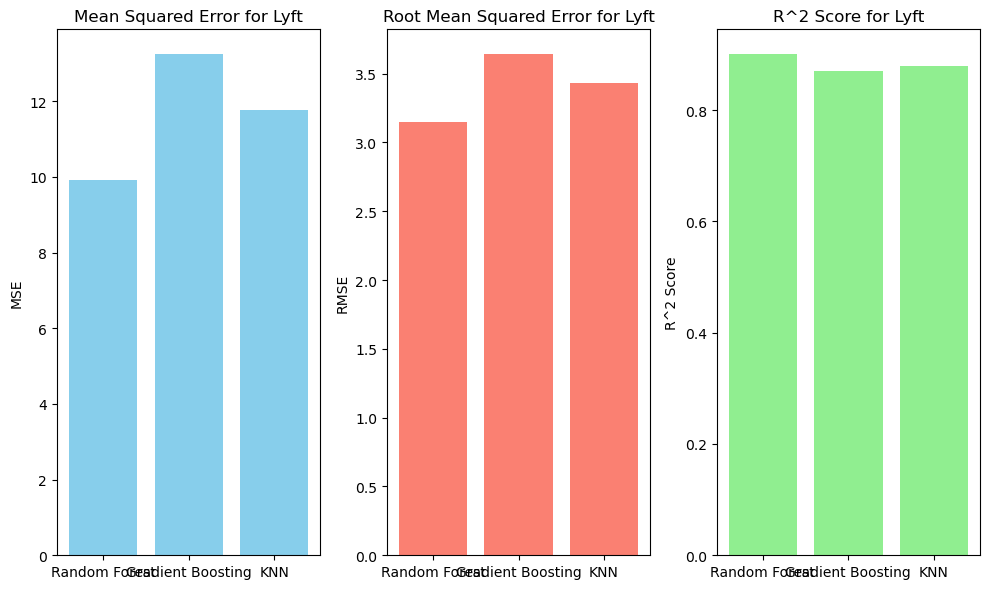

In [65]:
import matplotlib.pyplot as plt

# Create a bar plot for Uber dataset
uber_models = ['Random Forest', 'Gradient Boosting', 'KNN']
uber_mse = [4.54, 6.67, 5.30]
uber_rmse = [2.13, 2.58, 2.30]
uber_r2 = [0.94, 0.91, 0.93]

plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.bar(uber_models, uber_mse, color='skyblue')
plt.title('Mean Squared Error for Uber')
plt.ylabel('MSE')

plt.subplot(1, 3, 2)
plt.bar(uber_models, uber_rmse, color='salmon')
plt.title('Root Mean Squared Error for Uber')
plt.ylabel('RMSE')

plt.subplot(1, 3, 3)
plt.bar(uber_models, uber_r2, color='lightgreen')
plt.title('R^2 Score for Uber')
plt.ylabel('R^2 Score')

plt.tight_layout()
plt.show()

# Create a bar plot for Lyft dataset
lyft_models = ['Random Forest', 'Gradient Boosting', 'KNN']
lyft_mse = [9.91, 13.24, 11.77]
lyft_rmse = [3.15, 3.64, 3.43]
lyft_r2 = [0.90, 0.87, 0.88]

plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.bar(lyft_models, lyft_mse, color='skyblue')
plt.title('Mean Squared Error for Lyft')
plt.ylabel('MSE')

plt.subplot(1, 3, 2)
plt.bar(lyft_models, lyft_rmse, color='salmon')
plt.title('Root Mean Squared Error for Lyft')
plt.ylabel('RMSE')

plt.subplot(1, 3, 3)
plt.bar(lyft_models, lyft_r2, color='lightgreen')
plt.title('R^2 Score for Lyft')
plt.ylabel('R^2 Score')

plt.tight_layout()
plt.show()


### Based on these results, for the Uber dataset, the Random Forest Regressor performs the best with the lowest Mean Squared Error, Root Mean Squared Error, and highest R^2 Score. Similarly, for the Lyft dataset, the Random Forest Regressor also performs the best among the three models.